# **Linear Regression**

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables . The goal of linear regression is to fit a line or a hyperplane that best represents the relationship between these variables.It assumes that the relationship between the dependent and independent variables is linear, meaning that the change in the dependent variable is proportional to the change in the independent variable(s)


# **Simple Linear Regression**

Simple linear regression refers to the case where there is only one independent variable (predictor). It finds the line of best fit by minimizing the sum of the squared differences between the actual and predicted values of the dependent variable.


# **Multiple Linear Regression**

Multiple linear regression extends simple linear regression to model the relationship between two or more independent variables and the dependent variable. Instead of just one predictor variable, multiple linear regression uses multiple predictors to estimate the dependent variable.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df=pd.read_csv("/content/StudentsPerformance[1].csv")


In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
X_simple = df[['reading score']]
y = df['writing score']
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [85]:
df['reading score'].shape

(1000,)

In [86]:
df['writing score'].shape

(1000,)

In [87]:
df[['reading score']].shape

(1000, 1)

In [88]:
df[['reading score']].ndim

2

In [89]:
df.shape

(1000, 8)

In [90]:
df.ndim

2

In [91]:
df['reading score']

,reading score
0,72
1,90
2,95
3,57
4,78
...,...
995,99
996,55
997,71
998,78


In [92]:
df[['reading score']]

,reading score
0,72
1,90
2,95
3,57
4,78
...,...
995,99
996,55
997,71
998,78


In [93]:
X_train_simple

,reading score
29,70
535,83
695,89
557,67
836,64
...,...
106,100
270,63
860,62
435,48


In [94]:
y_train

,writing score
29,75
535,83
695,86
557,66
836,57
...,...
106,100
270,61
860,53
435,53


In [95]:
X_test_simple

,reading score
521,86
737,66
740,73
660,77
411,83
...,...
408,57
332,56
208,81
613,77


In [96]:
y_test

,writing score
521,84
737,73
740,72
660,73
411,78
...,...
408,56
332,53
208,76
613,74


In [97]:
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

LinearRegression()

In [98]:
y_pred_simple = simple_model.predict(X_test_simple)

In [99]:
print("Simple Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_simple):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_simple):.2f}")

Simple Linear Regression Metrics:
Mean Squared Error: 23.87
R^2 Score: 0.90


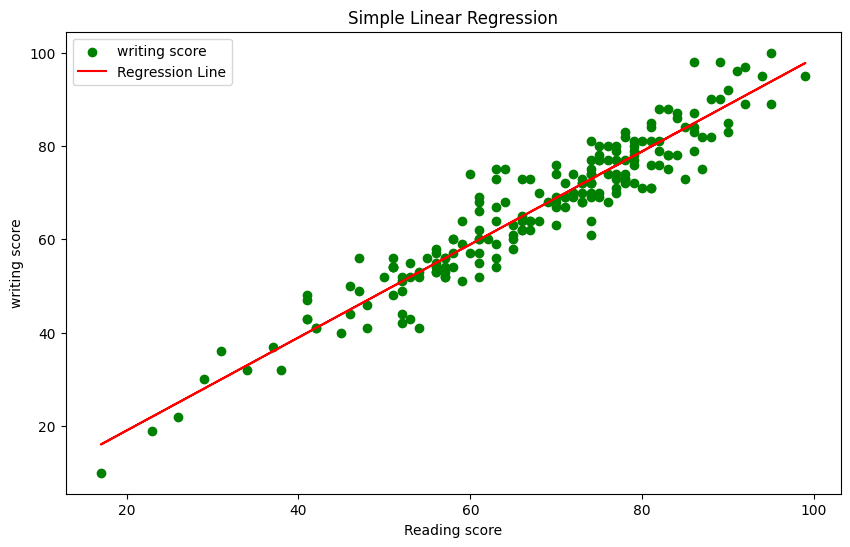

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color="green", label="writing score")
plt.plot(X_test_simple, y_pred_simple, color="red", label="Regression Line")
plt.xlabel("Reading score")
plt.ylabel("writing score")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

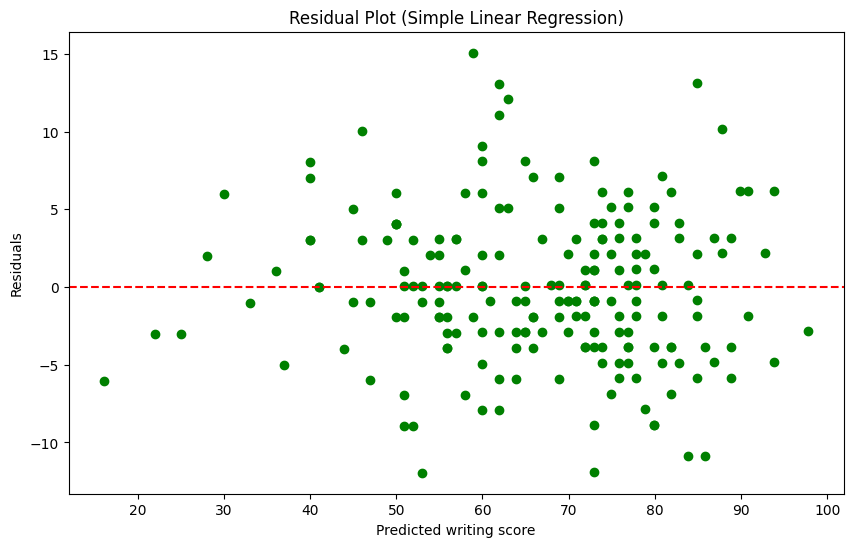

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_simple, y_test - y_pred_simple, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted writing score")
plt.ylabel("Residuals")
plt.title("Residual Plot (Simple Linear Regression)")
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
X_multi = df[['reading score', 'math score', 'gender']]
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [108]:
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

LinearRegression()

In [109]:
y_pred_multi = multi_model.predict(X_test_multi)

In [110]:
X_test_multi

,reading score,math score,gender
521,86,91,0
737,66,53,0
740,73,80,1
660,77,74,1
411,83,84,1
...,...,...,...
408,57,52,0
332,56,62,1
208,81,74,0
613,77,65,0


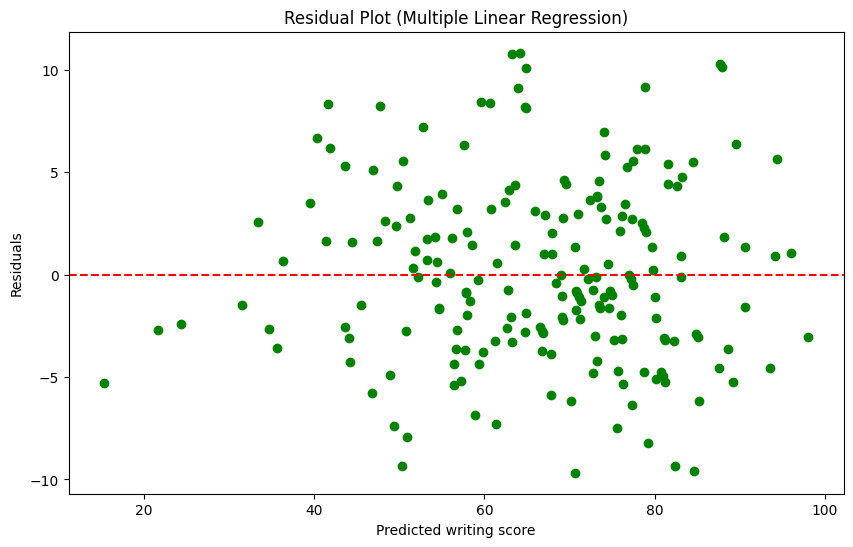

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, y_test - y_pred_multi, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted writing score")
plt.ylabel("Residuals")
plt.title("Residual Plot (Multiple Linear Regression)")
plt.show()

In [112]:
print("\nMultiple Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_multi):.2f}")


Multiple Linear Regression Metrics:
Mean Squared Error: 19.48
R^2 Score: 0.92
